# PRELIM PROJECT - GROUP 8 (4CSC)

- Arabia, Denisse Andrei
- Consorte, Aaryanah Micah
- De Lara, Aaron Charles
- Nicasio, Mark Joseph

------------------------------------------

## Methodologies  

1. Data Import & Exploration  
2. Identifying Data and Attributes  
3. Determining the Type of Dataset  
4. Data Quality Assessment  
5. Quantitative Statistics  
6. Application of Proximity (Distance Analysis)  
7. Data Mining: Association Rule Mining  


------------------------------------------

## ✔ Part 1: Data Import & Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from fredapi import Fred
import calendar
import holidays
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from scipy import stats
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import folium
import matplotlib.dates as mdates
import ipywidgets as widgets
from IPython.display import display
from statsmodels.tsa.arima.model import ARIMA
import warnings
from sklearn.metrics import r2_score
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
import time
import pickle
import os
from datetime import datetime

In [2]:
# Read the CSV file
file_path = 'data/wfp_food_prices_phl.csv'
df = pd.read_csv(file_path, low_memory=False)

# Display the first few rows of the dataframe
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,Maize flour (yellow),KG,actual,Retail,PHP,15.0,0.3717
2,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,Wholesale,PHP,18.35,0.4548
3,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,18.0,0.4461
4,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,Wholesale,PHP,16.35,0.4052


In [3]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123095 entries, 0 to 123094
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       123095 non-null  object
 1   admin1     123095 non-null  object
 2   admin2     123095 non-null  object
 3   market     123095 non-null  object
 4   latitude   123095 non-null  object
 5   longitude  123095 non-null  object
 6   category   123095 non-null  object
 7   commodity  123095 non-null  object
 8   unit       123095 non-null  object
 9   priceflag  123095 non-null  object
 10  pricetype  123095 non-null  object
 11  currency   123095 non-null  object
 12  price      123095 non-null  object
 13  usdprice   123095 non-null  object
dtypes: object(14)
memory usage: 13.1+ MB


In [4]:
# Drop the first row (index 0) which contains column header descriptions
df = df.drop(index=0).reset_index(drop=True)

In [5]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Display duplicate rows
duplicate_rows

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice


In [6]:
# Define lists of categorical and numerical columns for analysis

# Categorical columns include metadata like location, product details, and price attributes
categorical_cols = [
    "date", "admin1", "admin2", "market", 
    "category", "commodity", "unit", "priceflag", 
    "pricetype", "currency"
]

# Numerical columns include geographic coordinates and price values
numerical_cols = ["latitude", "longitude", "price", "usdprice"]

In [7]:
# Loop through each column in the list of categorical columns
for col in categorical_cols:
    # Print the name of the column
    print(f"Value counts for '{col}':")
    # Print the count of unique values in the column
    print(df[col].value_counts())
    # Print a separator line for better readability
    print("-" * 40)

Value counts for 'date':
date
2020-07-15    2795
2020-10-15    2790
2020-08-15    2782
2020-05-15    2745
2020-11-15    2743
              ... 
2019-06-15      18
2004-02-15      18
2020-02-15      18
2019-12-15      16
2019-11-15      16
Name: count, Length: 299, dtype: int64
----------------------------------------
Value counts for 'admin1':
admin1
Region III                              10625
Region VI                                9119
Region V                                 8893
Region VIII                              8525
Cordillera Administrative region         8287
Region XI                                8202
Region X                                 7190
Region IV-B                              7122
Region IV-A                              7084
Region XII                               6996
Region XIII                              6930
Region VII                               6681
Region I                                 6205
Region II                                6151
Reg

In [8]:
# Calculate and display summary statistics
print("Descriptive statistics for numerical columns:")
print(df[numerical_cols].describe())

Descriptive statistics for numerical columns:
         latitude   longitude   price usdprice
count      123094      123094  123094   123094
unique        105         104   18446    42009
top     14.604167  120.982222    30.0   0.8092
freq         3426        3426     601       52


In [9]:
# Check for null values
df.isnull().sum()

date         0
admin1       0
admin2       0
market       0
latitude     0
longitude    0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
usdprice     0
dtype: int64

## ✔ Part 1.1: Data Dictionary

In [10]:
# Data dictionary descriptions for the columns (Updated variable names)
data_descriptions = {
    "date": "Date when the price was recorded",
    "admin1": "First administrative division (region) where the market is located",
    "admin2": "Second administrative division (city) where the market is located",
    "market": "Name of the specific market where the commodity was recorded",
    "latitude": "Latitude coordinate of the market’s location",
    "longitude": "Longitude coordinate of the market’s location",
    "category": "General category to which the commodity belongs (e.g., 'oil and fats', 'cereals and tubers')",
    "commodity": "Specific item being traded (e.g., rice, wheat, tomatoes)",
    "unit": "Measurement unit of the commodity (e.g., kg, liter, piece)",
    "priceflag": "Flag indicating the reliability or nature of the price data (e.g., actual, aggregate)",
    "pricetype": "Type of price recorded (e.g., wholesale, retail, farmgate)",
    "currency": "Currency in which the price was recorded (e.g., USD, PHP)",
    "price": "Recorded price of the commodity in its local currency",
    "usdprice": "Price of the commodity converted into USD"
}


# Create the data dictionary DataFrame
data_dictionary = pd.DataFrame({
    'Column Name': df.columns,
    'Description': [data_descriptions.get(col, 'No description available') for col in df.columns],
    'Data Type': df.dtypes.values
})

# Display the data dictionary
data_dictionary

,Column Name,Description,Data Type
0,date,Date when the price was recorded,object
1,admin1,First administrative division (region) where t...,object
2,admin2,Second administrative division (city) where th...,object
3,market,Name of the specific market where the commodit...,object
4,latitude,Latitude coordinate of the market’s location,object
5,longitude,Longitude coordinate of the market’s location,object
6,category,General category to which the commodity belong...,object
7,commodity,"Specific item being traded (e.g., rice, wheat,...",object
8,unit,"Measurement unit of the commodity (e.g., kg, l...",object
9,priceflag,Flag indicating the reliability or nature of t...,object


------------------------------------------

## ✔ Part 2: Identifying Data and Attributes

In [11]:
# --- Convert Data Types ---
# Convert 'date' to datetime (invalid formats become NaT)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Convert latitude and longitude to numeric (float)
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# Convert price and usdprice to numeric (float)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['usdprice'] = pd.to_numeric(df['usdprice'], errors='coerce')

# --- Validate Reasonable Values ---
# Define valid conditions for each column:
valid_date = df['date'].notna()  # Date is valid if not NaT

# Add condition to only include dates on or after January 1, 2019
valid_start_date = df['date'] >= pd.Timestamp('2020-01-01')

# Latitude: valid if not NaN and between -90 and 90
valid_lat = df['latitude'].notna() & (df['latitude'] >= -90) & (df['latitude'] <= 90)

# Longitude: valid if not NaN and between -180 and 180
valid_lon = df['longitude'].notna() & (df['longitude'] >= -180) & (df['longitude'] <= 180)

# Price: valid if not NaN and non-negative
valid_price = df['price'].notna() & (df['price'] >= 0)

# usdprice: valid if not NaN and non-negative
valid_usdprice = df['usdprice'].notna() & (df['usdprice'] >= 0)

# Combine all conditions: only rows meeting all criteria are valid
all_valid = valid_date & valid_start_date & valid_lat & valid_lon & valid_price & valid_usdprice

# --- Create a New DataFrame with Only Valid Rows ---
df_cleaned = df[all_valid].copy()

print("Number of rows before cleaning:", len(df))
print("Number of rows after cleaning:", len(df_cleaned))

Number of rows before cleaning: 123094
Number of rows after cleaning: 99757


In [12]:
# Ensure 'date' is a datetime object
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'], errors='coerce')

# Create a 'month' column as a Period (year-month)
df_cleaned['month'] = df_cleaned['date'].dt.to_period('M')

# Function to find missing months for a group
def find_missing_months(group):
    # Determine the full range of months between the min and max month in the group
    full_range = pd.period_range(start=group['month'].min(), end=group['month'].max(), freq='M')
    # Get the unique months present in the group
    present = group['month'].unique()
    # Find missing months (set difference)
    missing = full_range.difference(present)
    return pd.Series({'missing_months': missing, 'num_missing': len(missing)})

# Group by commodity, admin1, and market and apply the function
missing_df = df_cleaned.groupby(['commodity', 'admin1', 'market']).apply(find_missing_months).reset_index()

# Display groups with missing months (i.e., where num_missing > 0)
missing_groups = missing_df[missing_df['num_missing'] > 0]
print("Groups with missing months:")
print(missing_groups)

Groups with missing months:
          commodity                                admin1             market  \
0         Anchovies  Autonomous region in Muslim Mindanao            Basilan   
1         Anchovies  Autonomous region in Muslim Mindanao      Lanao del Sur   
2         Anchovies  Autonomous region in Muslim Mindanao        Maguindanao   
3         Anchovies  Autonomous region in Muslim Mindanao               Sulu   
4         Anchovies  Autonomous region in Muslim Mindanao          Tawi-Tawi   
...             ...                                   ...                ...   
4897  Water spinach                            Region XII     Sultan Kudarat   
4898  Water spinach                           Region XIII   Agusan del Norte   
4899  Water spinach                           Region XIII     Agusan del Sur   
4900  Water spinach                           Region XIII  Surigao del Norte   
4901  Water spinach                           Region XIII    Surigao del Sur   

           

In [13]:
# Mark groups as missing or complete based on the number of missing months
missing_df['has_missing'] = missing_df['num_missing'] > 0

# Merge this indicator back with some aggregated statistics from your original data
group_stats = df_cleaned.groupby(['commodity', 'admin1', 'market']).agg({
    'price': ['mean', 'std'],
    'latitude': ['mean'],
    'longitude': ['mean']
}).reset_index()

group_stats.columns = ['commodity', 'admin1', 'market', 'price_mean', 'price_std', 'latitude', 'longitude']

# Merge with missing indicator
group_stats = pd.merge(group_stats, missing_df[['commodity', 'admin1', 'market', 'has_missing']], on=['commodity', 'admin1', 'market'], how='left')
group_stats['has_missing'] = group_stats['has_missing'].fillna(False)

print(group_stats.head(10))

   commodity                                admin1             market  \
0  Anchovies  Autonomous region in Muslim Mindanao            Basilan   
1  Anchovies  Autonomous region in Muslim Mindanao      Lanao del Sur   
2  Anchovies  Autonomous region in Muslim Mindanao        Maguindanao   
3  Anchovies  Autonomous region in Muslim Mindanao               Sulu   
4  Anchovies  Autonomous region in Muslim Mindanao          Tawi-Tawi   
5  Anchovies      Cordillera Administrative region            Benguet   
6  Anchovies      Cordillera Administrative region  Mountain Province   
7  Anchovies               National Capital region       Metro Manila   
8  Anchovies                              Region I       Ilocos Norte   
9  Anchovies                              Region I         Ilocos Sur   

   price_mean  price_std   latitude   longitude  has_missing  
0  133.406571  37.487119   6.663056  122.136111         True  
1  112.138182  12.000940   7.996562  124.279092         True  
2  142.

In [14]:
# --- Assume your missing_df is computed as before, which includes:
# 'commodity', 'admin1', 'market', 'missing_months', and 'num_missing'

# Create a binary indicator for missingness for each group:
missing_df['has_missing'] = missing_df['num_missing'] > 0

# Now, compute some group-level statistics from the original data.
# For example, compute the mean values for key variables for each (commodity, admin1, market) group.
group_stats = (
    df_cleaned.groupby(['commodity', 'admin1', 'market'])
             .agg({
                 'price': 'mean',
                 'latitude': 'mean',
                 'longitude': 'mean'
             })
             .reset_index()
)

# Merge the missingness indicator into the group-level stats.
group_stats = group_stats.merge(
    missing_df[['commodity', 'admin1', 'market', 'has_missing']],
    on=['commodity', 'admin1', 'market'],
    how='left'
)

# Fill missing has_missing with False (if any groups didn't appear in missing_df)
group_stats['has_missing'] = group_stats['has_missing'].fillna(False)

print("Group-level statistics with missingness indicator:")
print(group_stats.head(10))

# Now, convert the boolean missing indicator to a numeric variable (0/1)
group_stats['missing_numeric'] = group_stats['has_missing'].astype(int)

# Compute correlations between the missingness indicator and the key variables.
corr_matrix = group_stats[['price', 'latitude', 'longitude', 'missing_numeric']].corr()
print("\nCorrelation matrix between group-level variables and missingness:")
print(corr_matrix)

# Interpretation:
# - If 'missing_numeric' shows little or no correlation with the key variables, this suggests missingness is closer to MCAR.
# - If there are significant correlations (positive or negative), this suggests missingness might be MAR.

Group-level statistics with missingness indicator:
   commodity                                admin1             market  \
0  Anchovies  Autonomous region in Muslim Mindanao            Basilan   
1  Anchovies  Autonomous region in Muslim Mindanao      Lanao del Sur   
2  Anchovies  Autonomous region in Muslim Mindanao        Maguindanao   
3  Anchovies  Autonomous region in Muslim Mindanao               Sulu   
4  Anchovies  Autonomous region in Muslim Mindanao          Tawi-Tawi   
5  Anchovies      Cordillera Administrative region            Benguet   
6  Anchovies      Cordillera Administrative region  Mountain Province   
7  Anchovies               National Capital region       Metro Manila   
8  Anchovies                              Region I       Ilocos Norte   
9  Anchovies                              Region I         Ilocos Sur   

        price   latitude   longitude  has_missing  
0  133.406571   6.663056  122.136111         True  
1  112.138182   7.996562  124.279092     

In [15]:
# Identify categorical columns (all except 'date' and 'price')
categorical_cols = [col for col in df_cleaned.columns if col not in ['date', 'price', 'usdprice', 'month']]

# Pivot the table
df_pivot = df_cleaned.pivot(index=categorical_cols, columns='date', values='price')

# Rename columns to remove 'date' from headers
df_pivot.columns = [col.strftime('%Y-%m-%d') for col in df_pivot.columns]

# Reset index to bring categorical attributes back as columns
df_pivot = df_pivot.reset_index()

# Display Result
df_pivot.head()

,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,...,2024-04-15,2024-05-15,2024-06-15,2024-07-15,2024-08-15,2024-09-15,2024-10-15,2024-11-15,2024-12-15,2025-01-15
0,Autonomous region in Muslim Mindanao,Basilan,Basilan,6.663056,122.136111,cereals and tubers,Potatoes (Irish),KG,actual,Retail,...,165.71,154.29,156.43,164.29,NaN,NaN,167.14,NaN,NaN,161.43
1,Autonomous region in Muslim Mindanao,Basilan,Basilan,6.663056,122.136111,cereals and tubers,Rice (premium),KG,actual,Retail,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Autonomous region in Muslim Mindanao,Basilan,Basilan,6.663056,122.136111,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,...,54.44,54.96,53.88,52.45,51.13,53.56,52.44,51.57,53.69,50.39
3,Autonomous region in Muslim Mindanao,Basilan,Basilan,6.663056,122.136111,cereals and tubers,Rice (special),KG,actual,Retail,...,NaN,60.49,59.54,60.90,60.13,58.58,57.94,57.56,56.58,57.29
4,Autonomous region in Muslim Mindanao,Basilan,Basilan,6.663056,122.136111,cereals and tubers,Rice (well milled),KG,actual,Retail,...,56.71,NaN,55.85,56.94,55.06,54.71,53.94,NaN,NaN,51.44


In [16]:
# Define the expected full months per year
years = [2020, 2021, 2022, 2023, 2024]
months = [f"{m:02d}" for m in range(1, 13)]  # '01' to '12'
expected_cols = [f"{y}-{m}-15" for y in years for m in months]

# Add missing months with NaN
for col in expected_cols:
    if col not in df_pivot.columns:
        df_pivot[col] = np.nan  # Create missing month columns

# Reorder columns to maintain chronological order
df_pivot = df_pivot[['admin1', 'admin2', 'market', 'latitude', 'longitude',
                        'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency']
                        + expected_cols]

# Drop rows with 30 or more null values
df_pivot = df_pivot.dropna(thresh=len(df_pivot.columns) - 30)

# Identify numeric columns while excluding latitude & longitude
num_cols = df_pivot.select_dtypes(include=[np.number]).columns
price_cols = [col for col in num_cols if col not in ['latitude', 'longitude']]

# Apply both Backward Fill and Forward Fill row-wise
df_pivot[price_cols] = df_pivot[price_cols].bfill(axis=1).ffill(axis=1)

# Round only price columns to 2 decimal places (latitude & longitude remain unchanged)
df_pivot[price_cols] = df_pivot[price_cols].round(2)

# Display result
df_pivot

,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,...,2024-03-15,2024-04-15,2024-05-15,2024-06-15,2024-07-15,2024-08-15,2024-09-15,2024-10-15,2024-11-15,2024-12-15
2,Autonomous region in Muslim Mindanao,Basilan,Basilan,6.663056,122.136111,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,...,52.39,54.44,54.96,53.88,52.45,51.13,53.56,52.44,51.57,53.69
3,Autonomous region in Muslim Mindanao,Basilan,Basilan,6.663056,122.136111,cereals and tubers,Rice (special),KG,actual,Retail,...,60.49,60.49,60.49,59.54,60.90,60.13,58.58,57.94,57.56,56.58
4,Autonomous region in Muslim Mindanao,Basilan,Basilan,6.663056,122.136111,cereals and tubers,Rice (well milled),KG,actual,Retail,...,56.71,56.71,55.85,55.85,56.94,55.06,54.71,53.94,53.94,53.94
5,Autonomous region in Muslim Mindanao,Basilan,Basilan,6.663056,122.136111,cereals and tubers,Sweet potatoes,KG,actual,Retail,...,54.29,54.29,54.29,53.57,53.57,55.00,55.00,55.00,55.00,55.00
6,Autonomous region in Muslim Mindanao,Basilan,Basilan,6.663056,122.136111,cereals and tubers,Taro,KG,actual,Retail,...,52.86,52.86,52.86,50.71,50.71,49.29,49.29,49.29,49.29,49.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Region XIII,Surigao del Sur,Surigao del Sur,9.056504,126.196915,vegetables and fruits,Coconut,KG,actual,Retail,...,23.75,23.75,23.75,23.75,23.75,23.13,23.13,23.13,23.13,23.13
5035,Region XIII,Surigao del Sur,Surigao del Sur,9.056504,126.196915,vegetables and fruits,Garlic,KG,actual,Retail,...,157.50,152.50,152.50,155.00,150.00,151.25,152.50,150.00,158.75,170.00
5037,Region XIII,Surigao del Sur,Surigao del Sur,9.056504,126.196915,vegetables and fruits,Mangoes (carabao),KG,actual,Retail,...,113.75,123.75,123.75,116.25,116.25,116.25,168.75,140.00,140.00,141.25
5038,Region XIII,Surigao del Sur,Surigao del Sur,9.056504,126.196915,vegetables and fruits,Onions (red),KG,actual,Retail,...,152.50,130.00,110.00,126.25,128.75,126.25,118.75,122.50,130.00,131.25


In [17]:
# Get all non-date columns to use as id_vars, excluding 'Unnamed: 0'
id_columns = ['admin1', 'admin2', 'market', 'latitude', 'longitude', 'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency']

# Melt the dataframe
df_melted = pd.melt(df_pivot,
                    id_vars=id_columns,  # Keep all these columns as identifiers
                    var_name='date',     # New column for dates
                    value_name='price')  # New column for prices

# Convert date column to datetime
df_melted['date'] = pd.to_datetime(df_melted['date'], errors='coerce')

# Sort the dataframe
df_melted = df_melted.sort_values(['date'] + id_columns)

# Reset index
df_melted = df_melted.reset_index(drop=True)

# Reorder columns to put date first
df_melted = df_melted[['date'] + id_columns + ['price']]

# Display the result
print(df_melted.head())

        date                                admin1   admin2   market  \
0 2020-01-15  Autonomous region in Muslim Mindanao  Basilan  Basilan   
1 2020-01-15  Autonomous region in Muslim Mindanao  Basilan  Basilan   
2 2020-01-15  Autonomous region in Muslim Mindanao  Basilan  Basilan   
3 2020-01-15  Autonomous region in Muslim Mindanao  Basilan  Basilan   
4 2020-01-15  Autonomous region in Muslim Mindanao  Basilan  Basilan   

   latitude   longitude            category               commodity unit  \
0  6.663056  122.136111  cereals and tubers  Rice (regular, milled)   KG   
1  6.663056  122.136111  cereals and tubers          Rice (special)   KG   
2  6.663056  122.136111  cereals and tubers      Rice (well milled)   KG   
3  6.663056  122.136111  cereals and tubers          Sweet potatoes   KG   
4  6.663056  122.136111  cereals and tubers                    Taro   KG   

  priceflag pricetype currency  price  
0    actual    Retail      PHP  36.80  
1    actual    Retail      PHP

In [18]:
# Extract month from the date
df_melted['month'] = df_melted['date'].dt.month

# Convert month to cyclic features
df_melted['month_sin'] = np.sin(2 * np.pi * df_melted['month'] / 12)
df_melted['month_cos'] = np.cos(2 * np.pi * df_melted['month'] / 12)

In [19]:
central_lat = 14.5995   # Example: Latitude for Manila, Philippines
central_lon = 120.9842  # Example: Longitude for Manila, Philippines

# Define the Haversine function to compute distance in kilometers
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    # Differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    # Haversine formula
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    # Earth's radius in kilometers (6371 km)
    km = 6371 * c
    return km

df_melted['distance_from_central'] = haversine_distance(central_lat, central_lon, df_melted['latitude'], df_melted['longitude'])

print(df_melted[['market', 'latitude', 'longitude', 'distance_from_central']].tail())

                 market  latitude   longitude  distance_from_central
100135  Surigao del Sur  9.056504  126.196915             837.526133
100136  Surigao del Sur  9.056504  126.196915             837.526133
100137  Surigao del Sur  9.056504  126.196915             837.526133
100138  Surigao del Sur  9.056504  126.196915             837.526133
100139  Surigao del Sur  9.056504  126.196915             837.526133


In [20]:
# Classification of climate based on months
def determine_climate_season(date):
    month = date.month
    if 6 <= month <= 11:
        return "Rainy Season"
    elif month in [12, 1, 2]:
        return "Cool Dry Season"
    elif month in [3, 4, 5]:
        return "Hot Dry Season"
    else:
        return "Unknown"  # Fallback in case of unexpected values

df_melted['climate_season'] = df_melted['date'].apply(determine_climate_season)

In [21]:
# --- Retrieve USD-PHP Exchange Rate Data from FRED ---
fred = Fred(api_key='3acdf33d996d4189da7cb3843f1c5023') 

# Retrieve the exchange rate series from FRED using NBPHBIS (USD-PHP exchange rate)
exchange_series = fred.get_series('NBPHBIS', observation_start='2020-01-01', observation_end='2025-01-15')

df_exchange = exchange_series.to_frame(name='usd_exchange_rate')
df_exchange.index = pd.to_datetime(df_exchange.index)

# --- Process Exchange Rate Data ---
df_exchange_monthly = df_exchange.resample('M').mean().reset_index()
df_exchange_monthly['date'] = df_exchange_monthly['index'].apply(lambda d: d.replace(day=15))
df_exchange_final = df_exchange_monthly[['date', 'usd_exchange_rate']]

print("Exchange Rate Data (first 5 rows):")
print(df_exchange_final.head())

df_merged = pd.merge(df_melted, df_exchange_final, on='date', how='left')

print("\nMerged Data with Exchange Rate (last 5 rows):")
print(df_merged.tail())

Exchange Rate Data (first 5 rows):
        date  usd_exchange_rate
0 2020-01-15              97.27
1 2020-02-15              98.63
2 2020-03-15              99.15
3 2020-04-15             100.70
4 2020-05-15             100.57

Merged Data with Exchange Rate (last 5 rows):
             date       admin1           admin2           market  latitude  \
100135 2024-12-15  Region XIII  Surigao del Sur  Surigao del Sur  9.056504   
100136 2024-12-15  Region XIII  Surigao del Sur  Surigao del Sur  9.056504   
100137 2024-12-15  Region XIII  Surigao del Sur  Surigao del Sur  9.056504   
100138 2024-12-15  Region XIII  Surigao del Sur  Surigao del Sur  9.056504   
100139 2024-12-15  Region XIII  Surigao del Sur  Surigao del Sur  9.056504   

         longitude               category          commodity unit priceflag  \
100135  126.196915  vegetables and fruits            Coconut   KG    actual   
100136  126.196915  vegetables and fruits             Garlic   KG    actual   
100137  126.196915  

In [22]:
def flag_pandemic_phase(date):
    """
    Flag the pandemic phase based on the date.
    
    - Pre-pandemic: before March 1, 2020
    - Pandemic: from March 1, 2020 up to December 31, 2021
    - Post-pandemic: from January 1, 2022 onward
    """
    if date < pd.Timestamp('2020-03-01'):
        return "Pre-pandemic"
    elif date < pd.Timestamp('2022-01-01'):
        return "Pandemic"
    else:
        return "Post-pandemic"
    
df_merged['pandemic_phase'] = df_merged['date'].apply(flag_pandemic_phase)
print(df_merged[['date', 'pandemic_phase']].head(10))

        date pandemic_phase
0 2020-01-15   Pre-pandemic
1 2020-01-15   Pre-pandemic
2 2020-01-15   Pre-pandemic
3 2020-01-15   Pre-pandemic
4 2020-01-15   Pre-pandemic
5 2020-01-15   Pre-pandemic
6 2020-01-15   Pre-pandemic
7 2020-01-15   Pre-pandemic
8 2020-01-15   Pre-pandemic
9 2020-01-15   Pre-pandemic


In [23]:
ph_holidays = holidays.PH(years=range(2020, 2025))

major_holidays_list = [
    "New Year's Day", "Christmas Day",
]

def major_holiday_flag(date, major_list=major_holidays_list):
    """
    Flag whether there is any major holiday within the same month as 'date'.
    Returns 1 if a major holiday is found in that month, otherwise 0.
    """
    year = date.year
    month = date.month
    # Determine the start and end dates of the month
    start_date = pd.Timestamp(year, month, 1)
    end_date = pd.Timestamp(year, month, calendar.monthrange(year, month)[1])
    
    # Check each date in the month for a major holiday
    for single_date in pd.date_range(start_date, end_date):
        if single_date in ph_holidays:
            holiday_name = ph_holidays[single_date]
            # Check if the holiday name matches any in our major list (case insensitive)
            if any(major.lower() in holiday_name.lower() for major in major_list):
                return 1
    return 0

df_merged['major_holiday_flag'] = df_merged['date'].apply(major_holiday_flag)

print(df_merged[['date', 'major_holiday_flag']].head(20))

         date  major_holiday_flag
0  2020-01-15                   1
1  2020-01-15                   1
2  2020-01-15                   1
3  2020-01-15                   1
4  2020-01-15                   1
5  2020-01-15                   1
6  2020-01-15                   1
7  2020-01-15                   1
8  2020-01-15                   1
9  2020-01-15                   1
10 2020-01-15                   1
11 2020-01-15                   1
12 2020-01-15                   1
13 2020-01-15                   1
14 2020-01-15                   1
15 2020-01-15                   1
16 2020-01-15                   1
17 2020-01-15                   1
18 2020-01-15                   1
19 2020-01-15                   1


In [24]:
df_metro = df_merged[df_merged['admin1'] == 'National Capital region']

# Keep only the date and holiday flag columns
df_metro = df_metro[['date', 'major_holiday_flag']].copy()

# Create a 'year' column from the date
df_metro['year'] = df_metro['date'].dt.year

# Sort the DataFrame by date (if not already sorted)
df_metro.sort_values('date', inplace=True)

# Print the table for each year
for year, group in df_metro.groupby('year'):
    print(f"\n--- Year: {year} ---")
    print(group[['date', 'major_holiday_flag']].to_string(index=False))


--- Year: 2020 ---
      date  major_holiday_flag
2020-01-15                   1
2020-01-15                   1
2020-01-15                   1
2020-01-15                   1
2020-01-15                   1
2020-01-15                   1
2020-01-15                   1
2020-01-15                   1
2020-01-15                   1
2020-01-15                   1
2020-01-15                   1
2020-01-15                   1
2020-01-15                   1
2020-01-15                   1
2020-01-15                   1
2020-01-15                   1
2020-01-15                   1
2020-01-15                   1
2020-01-15                   1
2020-01-15                   1
2020-02-15                   0
2020-02-15                   0
2020-02-15                   0
2020-02-15                   0
2020-02-15                   0
2020-02-15                   0
2020-02-15                   0
2020-02-15                   0
2020-02-15                   0
2020-02-15                   0
2020-02-15         

## Part 2.1: Compute Inflation Rate by Commodity & Pandemic Phase

In [25]:
# Group by pandemic_phase, commodity, and month, then compute the average price for that month.
agg_phase = (
    df_merged.groupby(['admin1', 'admin2', 'market', 'latitude', 'longitude', 
                       'category', 'unit', 'priceflag', 'pricetype', 
                       'major_holiday_flag', 'climate_season', 'commodity', 
                       'month', 'distance_from_central', 'pandemic_phase'])['price']
    .mean()
    .reset_index()
)

# Sort by pandemic_phase, commodity, and month so that the percentage change is computed chronologically.
agg_phase = agg_phase.sort_values(by=['pandemic_phase', 'commodity', 'month'])

# Compute the inflation rate (percentage change in average price) for each commodity within each pandemic phase.
agg_phase['inflation_rate'] = (
    agg_phase.groupby(['pandemic_phase', 'commodity'])['price']
    .pct_change() * 100
)

# Fill NaN values (which occur as the first observation for each group) with the median inflation rate for that group.
agg_phase['inflation_rate'] = agg_phase.groupby(['pandemic_phase', 'commodity'])['inflation_rate'] \
                                     .transform(lambda x: x.fillna(x.median()))

print("Inflation rate by commodity for each pandemic phase:")
print(agg_phase.head(20))

Inflation rate by commodity for each pandemic phase:
                                     admin1               admin2  \
172    Autonomous region in Muslim Mindanao              Basilan   
510    Autonomous region in Muslim Mindanao        Lanao del Sur   
958    Autonomous region in Muslim Mindanao          Maguindanao   
1394   Autonomous region in Muslim Mindanao                 Sulu   
1685   Autonomous region in Muslim Mindanao            Tawi-Tawi   
5321                National Capital region  Metropolitan Manila   
5872                               Region I         Ilocos Norte   
6470                               Region I           Ilocos Sur   
11447                            Region III              Bulacan   
12128                            Region III              Bulacan   
13319                            Region III               Tarlac   
13818                            Region III             Zambales   
14416                           Region IV-A             Batanga

## Part 2.2: Compute Inflation Rate by Commodity & (Climate Season + Market)

In [26]:
# Group by pandemic_phase, commodity, and month, then compute the average price for that month.
agg_geo = (
    df_merged.groupby(['admin1', 'admin2', 'market', 'latitude', 'longitude', 
                       'category', 'unit', 'priceflag', 'pricetype', 
                       'major_holiday_flag', 'climate_season', 'commodity', 
                       'month', 'distance_from_central', 'pandemic_phase'])['price']
    .mean()
    .reset_index()
)

agg_geo = agg_geo.sort_values(by=['admin1', 'climate_season', 'commodity', 'month'])

# Compute the inflation rate (percentage change in average price) for each commodity 
# within each group.
agg_geo['inflation_rate'] = (
    agg_geo.groupby(['admin1', 'climate_season', 'commodity'])['price']
    .pct_change() * 100
)

# Fill missing inflation_rate values with the median inflation rate of the respective group.
# For groups that have no valid (non-missing) values, fill with 0.
agg_geo['inflation_rate'] = agg_geo.groupby(['admin1', 'climate_season', 'commodity'])['inflation_rate'] \
    .transform(lambda x: x.fillna(x.dropna().median() if len(x.dropna()) > 0 else 0))

print("Inflation rate by commodity for each combination of climate season and region (after median imputation):")
print(agg_geo.head(20))

Inflation rate by commodity for each combination of climate season and region (after median imputation):
                                    admin1         admin2         market  \
172   Autonomous region in Muslim Mindanao        Basilan        Basilan   
173   Autonomous region in Muslim Mindanao        Basilan        Basilan   
174   Autonomous region in Muslim Mindanao        Basilan        Basilan   
510   Autonomous region in Muslim Mindanao  Lanao del Sur  Lanao del Sur   
511   Autonomous region in Muslim Mindanao  Lanao del Sur  Lanao del Sur   
512   Autonomous region in Muslim Mindanao  Lanao del Sur  Lanao del Sur   
958   Autonomous region in Muslim Mindanao    Maguindanao    Maguindanao   
959   Autonomous region in Muslim Mindanao    Maguindanao    Maguindanao   
960   Autonomous region in Muslim Mindanao    Maguindanao    Maguindanao   
1394  Autonomous region in Muslim Mindanao           Sulu           Sulu   
1395  Autonomous region in Muslim Mindanao           Sulu  

## Part 5: Quantitative Statistics

In [27]:
# Display information about the DataFrame
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100140 entries, 0 to 100139
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   date                   100140 non-null  datetime64[ns]
 1   admin1                 100140 non-null  object        
 2   admin2                 100140 non-null  object        
 3   market                 100140 non-null  object        
 4   latitude               100140 non-null  float64       
 5   longitude              100140 non-null  float64       
 6   category               100140 non-null  object        
 7   commodity              100140 non-null  object        
 8   unit                   100140 non-null  object        
 9   priceflag              100140 non-null  object        
 10  pricetype              100140 non-null  object        
 11  currency               100140 non-null  object        
 12  price                  100140 non-null  floa

In [28]:
# Check for the number of unique values
for column in df_merged.columns:
    unique_values = df_merged[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print(f"Number of Unique Values: {len(unique_values)}\n")

Column: date
Unique Values: <DatetimeArray>
['2020-01-15 00:00:00', '2020-02-15 00:00:00', '2020-03-15 00:00:00',
 '2020-04-15 00:00:00', '2020-05-15 00:00:00', '2020-06-15 00:00:00',
 '2020-07-15 00:00:00', '2020-08-15 00:00:00', '2020-09-15 00:00:00',
 '2020-10-15 00:00:00', '2020-11-15 00:00:00', '2020-12-15 00:00:00',
 '2021-01-15 00:00:00', '2021-02-15 00:00:00', '2021-03-15 00:00:00',
 '2021-04-15 00:00:00', '2021-05-15 00:00:00', '2021-06-15 00:00:00',
 '2021-07-15 00:00:00', '2021-08-15 00:00:00', '2021-09-15 00:00:00',
 '2021-10-15 00:00:00', '2021-11-15 00:00:00', '2021-12-15 00:00:00',
 '2022-01-15 00:00:00', '2022-02-15 00:00:00', '2022-03-15 00:00:00',
 '2022-04-15 00:00:00', '2022-05-15 00:00:00', '2022-06-15 00:00:00',
 '2022-07-15 00:00:00', '2022-08-15 00:00:00', '2022-09-15 00:00:00',
 '2022-10-15 00:00:00', '2022-11-15 00:00:00', '2022-12-15 00:00:00',
 '2023-01-15 00:00:00', '2023-02-15 00:00:00', '2023-03-15 00:00:00',
 '2023-04-15 00:00:00', '2023-05-15 00:00:00',

## Part 5.1: Exploratory Data Analysis

In [29]:
# Summary Statistics
summary_stats = df_merged.describe().round(2)
summary_stats

,date,latitude,longitude,price,month,month_sin,month_cos,distance_from_central,usd_exchange_rate,major_holiday_flag
count,100140,100140.00,100140.00,100140.00,100140.00,100140.00,100140.00,100140.00,100140.00,100140.00
mean,2022-06-30 15:12:00,11.92,122.85,129.43,6.50,-0.00,-0.00,481.06,97.09,0.17
min,2020-01-15 00:00:00,5.03,118.74,5.33,1.00,-1.00,-1.00,0.56,93.73,0.00
25%,2021-04-07 06:00:00,8.61,121.09,46.66,3.75,-0.59,-0.59,210.50,95.17,0.00
50%,2022-06-30 00:00:00,11.71,122.76,92.50,6.50,-0.00,-0.00,439.69,96.90,0.00
75%,2023-09-22 12:00:00,14.84,124.65,170.00,9.25,0.59,0.59,778.39,98.69,0.00
max,2024-12-15 00:00:00,18.19,126.21,1166.00,12.00,1.00,1.00,1072.39,101.33,1.00
std,NaN,3.55,1.89,122.30,3.45,0.71,0.71,310.85,2.12,0.37


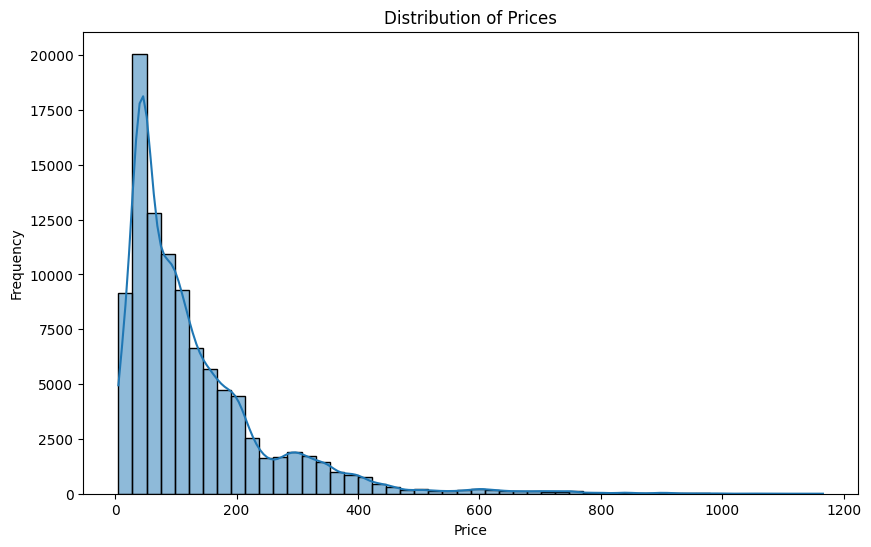

In [30]:
# Distribution of Prices
plt.figure(figsize=(10, 6))
sns.histplot(df_merged['price'], bins=50, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### **Histogram Analysis of Commodity Prices**
The histogram shows a **right-skewed distribution**, where most prices are concentrated at the lower end, with fewer high-priced commodities. The **KDE line** highlights this trend, indicating that **lower prices are more common**, while higher prices occur less frequently.

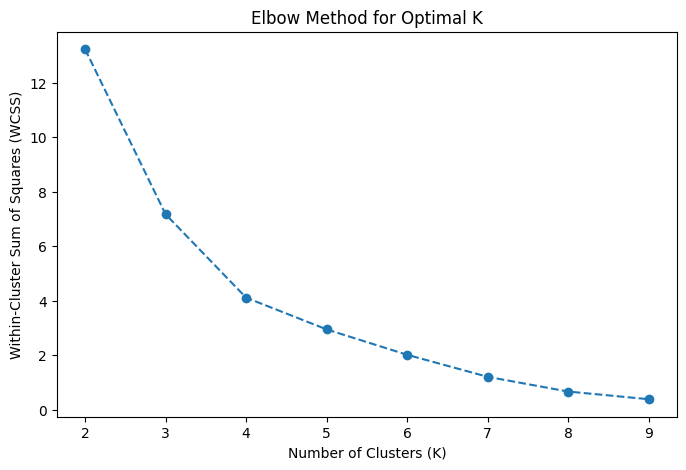

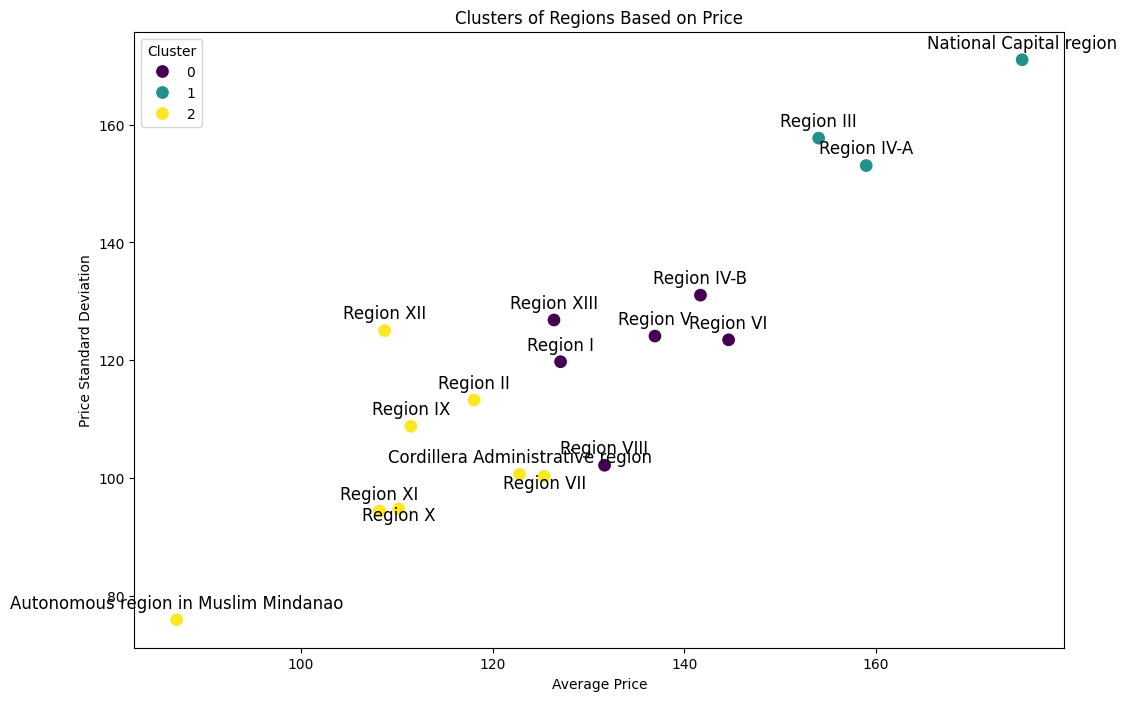

Cluster 2:
 - Autonomous region in Muslim Mindanao
 - Cordillera Administrative region
 - Region II
 - Region IX
 - Region VII
 - Region X
 - Region XI
 - Region XII


Cluster 1:
 - National Capital region
 - Region III
 - Region IV-A


Cluster 0:
 - Region I
 - Region IV-B
 - Region V
 - Region VI
 - Region VIII
 - Region XIII




In [31]:
# Group by region (admin1) and compute average commodity price per region
region_prices = df_merged.groupby("admin1").agg({"price": ["mean", "std"]}).reset_index()
region_prices.columns = ["Region", "Avg_Price", "Price_StdDev"]

# Replace "Cordillera Administrative Region" with "CAR" and "Autonomous Region in Muslim Mindanao" with "ARMM"
region_prices["Region"] = region_prices["Region"].replace({
    "Cordillera Administrative Region": "CAR",
    "Autonomous Region in Muslim Mindanao": "ARMM"
})

# Fill missing values (replace NaNs with column mean)
region_prices[["Avg_Price", "Price_StdDev"]] = region_prices[["Avg_Price", "Price_StdDev"]].fillna(region_prices[["Avg_Price", "Price_StdDev"]].mean())

# Standardize the numerical features for better clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(region_prices[["Avg_Price", "Price_StdDev"]])

# Finding the optimal K using the Elbow Method
wcss = []
K_range = range(2, 10)  # Trying K from 2 to 10
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()

# Choose optimal K (adjust based on the elbow method)
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
region_prices["Cluster"] = kmeans.fit_predict(scaled_features)

# Scatterplot of clusters with region labels
plt.figure(figsize=(12, 8))
sns.scatterplot(data=region_prices, x="Avg_Price", y="Price_StdDev", hue="Cluster", palette="viridis", s=100)
plt.title("Clusters of Regions Based on Price")
plt.xlabel("Average Price")
plt.ylabel("Price Standard Deviation")
plt.legend(title="Cluster")

# Add labels for each region
for i in range(region_prices.shape[0]):
    region = region_prices["Region"][i]
    if region in ["Region X", "Region VII"]:
        plt.text(region_prices["Avg_Price"][i], region_prices["Price_StdDev"][i] - 2, region, fontsize=12, ha='center')
    else:
        plt.text(region_prices["Avg_Price"][i], region_prices["Price_StdDev"][i] + 2, region, fontsize=12, ha='center')

plt.show()

# Print regions grouped by their cluster labels
for cluster in region_prices['Cluster'].unique():
    print(f"Cluster {cluster}:")
    regions_in_cluster = region_prices[region_prices['Cluster'] == cluster]['Region'].tolist()
    for region in regions_in_cluster:
        print(f" - {region}")
    print("\n")

# Merge latitude & longitude from df_merged
location_data = df_merged.groupby("admin1")[["latitude", "longitude"]].mean().reset_index()
region_prices = region_prices.merge(location_data, left_on="Region", right_on="admin1", how="left")

# Generate an interactive map
m = folium.Map(location=[df_merged["latitude"].mean(), df_merged["longitude"].mean()], zoom_start=6)
colors = ["red", "blue", "green", "purple", "orange"]

for _, row in region_prices.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=5,
        color=colors[row["Cluster"]],
        fill=True,
        fill_color=colors[row["Cluster"]],
        fill_opacity=0.7,
        popup=f"{row['Region']} - Cluster {row['Cluster']}"
    ).add_to(m)

m.save("region_clusters.html")  # Save map as HTML file

### **Elbow Method Interpretation**
- **X-axis:** Number of clusters (K).  
- **Y-axis:** Within-Cluster Sum of Squares (WCSS), representing variance within clusters.  
- **Elbow Point:** The point where WCSS stops decreasing significantly, indicating the optimal K.  

### **Findings:**  
- **Sharp WCSS Drop (K=2 to K=3):** Significant variance reduction.  
- **Slower Decrease Beyond K=3:** Forms an "elbow" at K=3.  
- **Optimal K = 3:** Balances variance reduction and model simplicity.  

This suggests that using **3 clusters** effectively groups the data while maintaining interpretability. 📊  


### **Regional Clustering Analysis (K-Means)**
The scatter plot visualizes regional clustering based on **average price** and **price variability**, using K-Means. The **Elbow Method** determines the optimal number of clusters.  

### **Cluster Interpretations:**  
- **Cluster 0 (Purple):** Moderate prices & variability → Balanced market.  
- **Cluster 1 (Teal):** High prices & variability → Market fluctuations or supply-demand imbalances.  
- **Cluster 2 (Yellow):** Low prices & stability → Steady supply chain with minimal volatility.  

This analysis provides insights into **regional market dynamics**, aiding in **pricing strategies, supply chain decisions, and policy-making**.


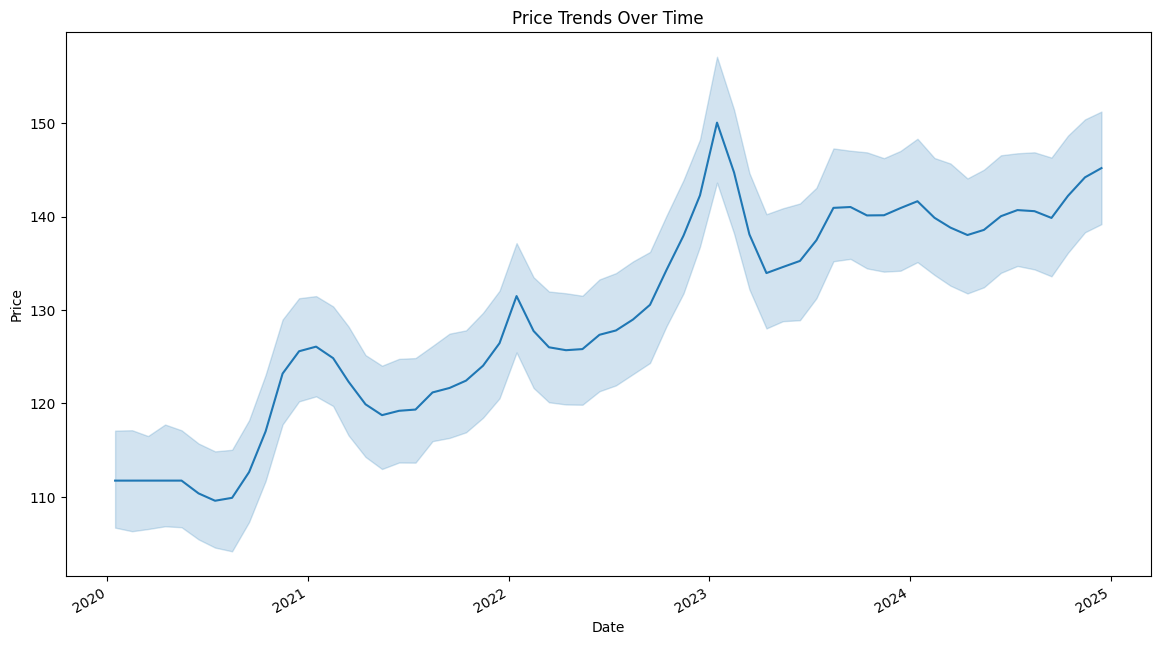

In [32]:
# Price Trends Over Time
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_merged, x='date', y='price')
plt.title('Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Price')

# Set date format on x-axis to show only the year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format date as Year

# Automatically format x-axis labels for better readability
plt.gcf().autofmt_xdate()

plt.show()

### **Price Trends Over Time**
- **X-axis (Date):** Represents the period from 2020 to 2025.  
- **Y-axis (Price):** Represents the average commodity price.  

### **Key Observations:**
- **Overall Upward Trend:** Prices have generally increased over time.  
- **Seasonal Fluctuations:** Peaks and troughs suggest cyclical factors.  
- **Significant Peaks:** Sharp increases in early 2021 and mid-2023.  
- **Confidence Interval:** Wider intervals indicate higher price volatility.  

### **Summary:**  
Commodity prices have risen from 2020 to 2025, with periodic fluctuations and notable peaks, likely due to market conditions or external factors.


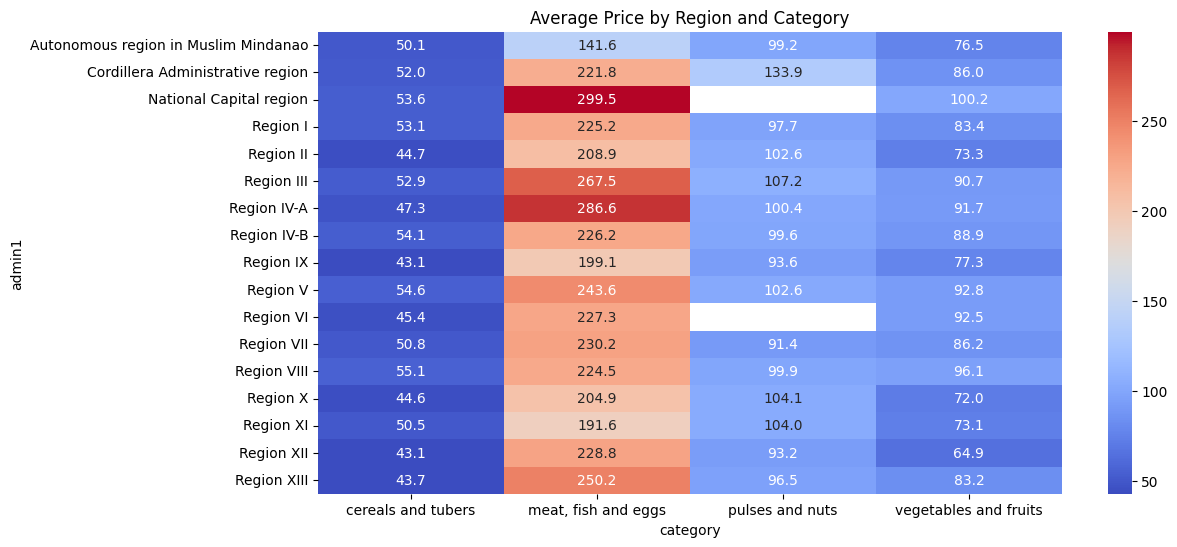

In [33]:
# Heatmap of Prices by Region
plt.figure(figsize=(12, 6))
df_pivot2 = df_merged.pivot_table(index='admin1', columns='category', values='price', aggfunc='mean')
sns.heatmap(df_pivot2, cmap='coolwarm', annot=True, fmt='.1f')
plt.title('Average Price by Region and Category')
plt.show()

- National Capital Region (NCR): Shows the highest average prices, especially for meat, fish, and eggs.
- Cordillera Administrative Region (CAR) and Region III: Also have relatively high prices for meat, fish, and eggs.
- Regions IX, XII, and XIII: Tend to have lower average prices across most categories.
- Price Variation: There is significant variation in prices across different regions and categories, indicating regional disparities in commodity prices.

In [34]:
df_cleaned1 = df_merged.copy()

C:\Users\RHODA\AppData\Local\Temp\ipykernel_17996\3891216040.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_prices, y=avg_prices.index, palette=colors)


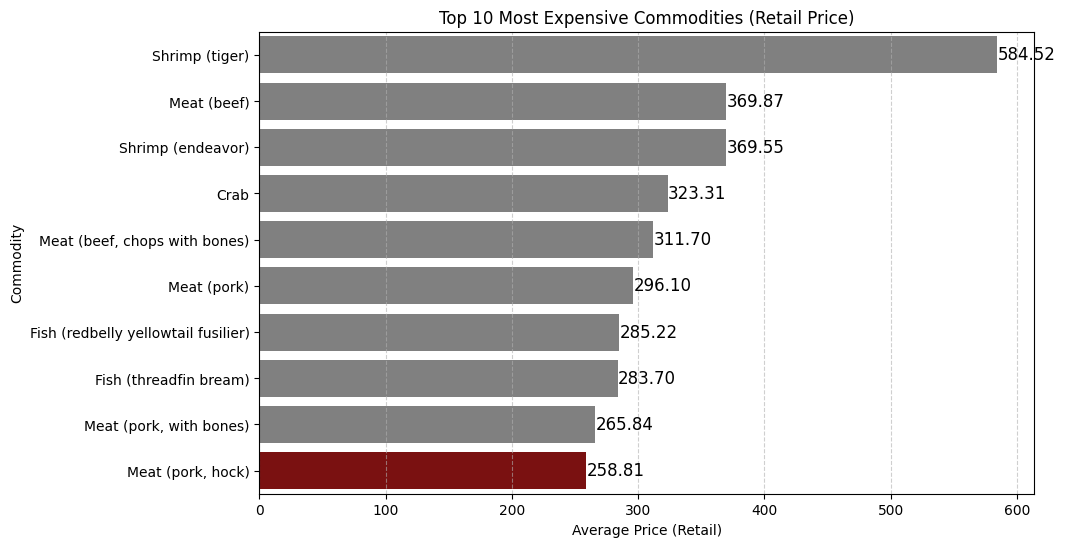

In [35]:
# Compute average prices and select top 10 most expensive commodities
avg_prices = df_merged.groupby('commodity')['price'].mean().sort_values(ascending=False).head(10)

# Define color scheme (highlight the most expensive commodity)
colors = ['gray'] * (len(avg_prices) - 1) + ['darkred']  # Dark red for highest price

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_prices, y=avg_prices.index, palette=colors)

# Add price labels to each bar
for index, value in enumerate(avg_prices):
    plt.text(value + 0.5, index, f"{value:.2f}", va='center', fontsize=12)

plt.xlabel('Average Price (Retail)')
plt.ylabel('Commodity')
plt.title('Top 10 Most Expensive Commodities (Retail Price)')
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Light grid for readability

plt.show()

In [36]:
# Compute the average price per commodity within each category
df_avg_price = df_merged.groupby(['category', 'commodity'])['price'].mean().reset_index()

# Function to get the top 10 most expensive commodities per category
def get_top_10_expensive(df):
    return df.sort_values(by=['category', 'price'], ascending=[True, False]).groupby('category').head(10)

df_top_10 = get_top_10_expensive(df_avg_price)

# Create a dropdown for category selection
category_dropdown = widgets.Dropdown(
    options=sorted(df_top_10["category"].unique()),
    description="Category:",
    disabled=False
)

# Function to update the plot based on selected category
def update_plot(category):
    df_filtered = df_top_10[df_top_10["category"] == category].sort_values(by="price", ascending=False)

    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")
    
    # Use a better color scheme (coolwarm)
    colors = sns.color_palette("coolwarm", len(df_filtered))

    ax = sns.barplot(
        x=df_filtered["price"], 
        y=df_filtered["commodity"], 
        palette=colors
    )

    # Add price labels inside bars
    for index, value in enumerate(df_filtered["price"]):
        ax.text(value - 0.2, index, f"{value:.2f}", va='center', ha='right', fontsize=11, color="white", fontweight="bold")

    # Formatting
    plt.xlabel("Average Price (Retail)", fontsize=14, fontweight='bold')
    plt.ylabel("Commodity", fontsize=14, fontweight='bold')
    plt.title(f"Top 10 Most Expensive Commodities in {category}", fontsize=16, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.6)

    plt.show()

# Display the dropdown and interactive plot
widgets.interact(update_plot, category=category_dropdown)

C:\Users\RHODA\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipywidgets\widgets\interaction.py:44: DeprecationWarning: `ipykernel.pylab.backend_inline` is deprecated, directly use `matplotlib_inline.backend_inline`
  from ipykernel.pylab.backend_inline import flush_figures


interactive(children=(Dropdown(description='Category:', options=('cereals and tubers', 'meat, fish and eggs', …

<function __main__.update_plot(category)>

In [37]:
df_merged['commodity'].unique()

array(['Rice (regular, milled)', 'Rice (special)', 'Rice (well milled)',
       'Sweet potatoes', 'Taro', 'Anchovies', 'Eggs', 'Fish (roundscad)',
       'Beans (mung)', 'Beans (string)', 'Bitter melon', 'Cabbage',
       'Coconut', 'Garlic', 'Ginger', 'Onions (white)', 'Squashes',
       'Fish (tilapia)', 'Bananas (lakatan)', 'Choko', 'Onions (red)',
       'Semolina (yellow)', 'Fish (milkfish)', 'Meat (pork, with bones)',
       'Shrimp (tiger)', 'Bananas (latundan)', 'Bottle gourd',
       'Calamansi', 'Carrots', 'Eggplants', 'Mangoes (piko)',
       'Fish (redbelly yellowtail fusilier)', 'Meat (chicken, whole)',
       'Mangoes (carabao)', 'Meat (beef)', 'Potatoes (Irish)',
       'Beans (green, fresh)', 'Pineapples', 'Meat (pork)',
       'Groundnuts (shelled)', 'Fish (frigate tuna)', 'Fish (slipmouth)',
       'Fish (threadfin bream)', 'Tomatoes', 'Water spinach',
       'Bananas (saba)', 'Crab', 'Shrimp (endeavor)', 'Cabbage (chinese)',
       'Eggs (duck)', 'Maize (yellow)', 'S

In [38]:
# Define priority commodities based on the most commonly consumed food in the Philippines
priority_commodities = [
    "Rice (regular, milled)", "Rice (special)", "Rice (well milled)", "Onions (red)", "Onions (white)", "Garlic", 
    "Eggs", "Meat (pork)", "Meat (chicken, whole)", "Tomatoes", "Eggplants", 
    "Bananas (lakatan)", "Bananas (latundan)", "Bananas (saba)"
]

# Dropdown for commodity selection
commodity_dropdown = widgets.Dropdown(
    options=priority_commodities,
    description="Commodity:",
    style={'description_width': 'initial'}
)

# Function to plot inflation rate
def plot_inflation(commodity):
    df_filtered = df_merged[(df_merged["commodity"] == commodity) & (df_merged["date"].dt.year < 2025)].copy()
    
    if df_filtered.empty:
        print("No data available for this commodity.")
        return
    
    df_filtered["year"] = df_filtered["date"].dt.year
    df_yearly = df_filtered.groupby("year", as_index=False)["price"].mean()
    df_yearly["inflation_rate"] = df_yearly["price"].pct_change() * 100

    # Plot inflation rate over time
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=df_yearly, x="year", y="inflation_rate", marker="o", linewidth=2, color="red")

    plt.xlabel("Year", fontsize=12, fontweight="bold")
    plt.ylabel("Inflation Rate (%)", fontsize=12, fontweight="bold")
    plt.title(f"Inflation Rate of '{commodity}' Over Time", fontsize=14, fontweight="bold")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

# Create an interactive widget
widgets.interactive(plot_inflation, commodity=commodity_dropdown)

interactive(children=(Dropdown(description='Commodity:', options=('Rice (regular, milled)', 'Rice (special)', …

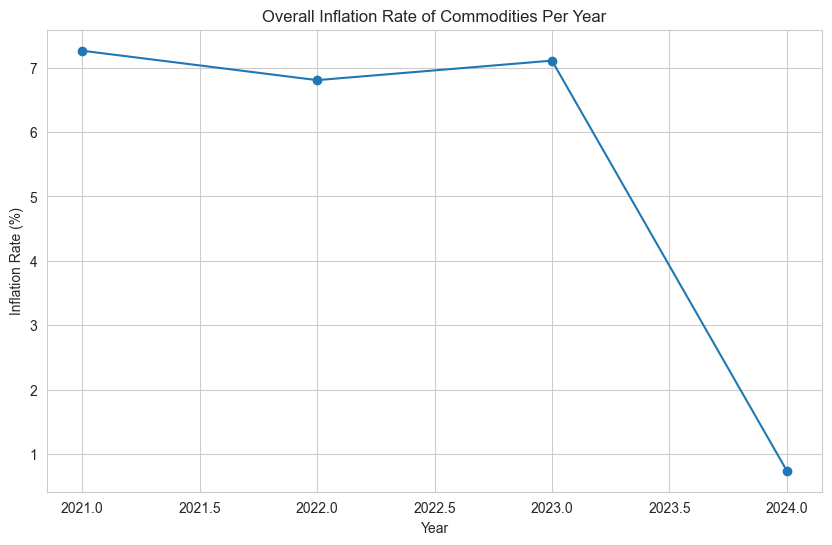

In [39]:
# Extract the year from the date column
df_merged['year'] = df_merged['date'].dt.year

# Calculate the average price per year
avg_price_per_year = df_merged.groupby('year')['price'].mean().reset_index()

# Calculate the year-over-year inflation rate
avg_price_per_year['inflation_rate'] = avg_price_per_year['price'].pct_change() * 100

# Drop the first row with NaN inflation rate
avg_price_per_year = avg_price_per_year.dropna()

# Plot the inflation rate
plt.figure(figsize=(10, 6))
plt.plot(avg_price_per_year['year'], avg_price_per_year['inflation_rate'], marker='o', linestyle='-')
plt.title('Overall Inflation Rate of Commodities Per Year')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)
plt.show()

C:\Users\RHODA\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\RHODA\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\RHODA\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\RHODA\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to est

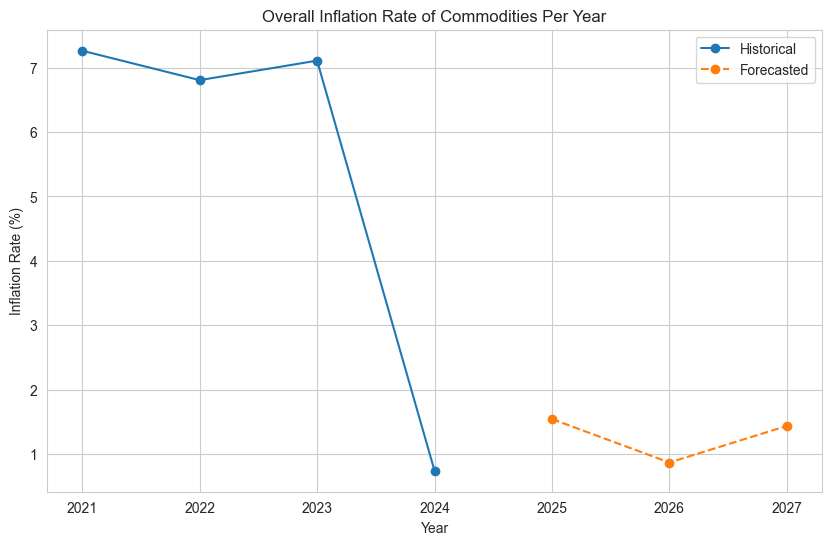

   year  inflation_rate
4  2025        1.543517
5  2026        0.868666
6  2027        1.436284


In [40]:
# Calculate the average price per year
avg_price_per_year = df_merged.groupby('year')['price'].mean().reset_index()

# Calculate the year-over-year inflation rate
avg_price_per_year['inflation_rate'] = avg_price_per_year['price'].pct_change() * 100

# Drop the first row with NaN inflation rate
avg_price_per_year = avg_price_per_year.dropna()

# Fit the ARIMA model
model = ARIMA(avg_price_per_year['inflation_rate'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast the inflation rate for the next 3 years
forecast = model_fit.forecast(steps=3)
forecast_years = [avg_price_per_year['year'].max() + i for i in range(1, 4)]

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({'year': forecast_years, 'inflation_rate': forecast})

# Plot the historical and forecasted inflation rates
plt.figure(figsize=(10, 6))
plt.plot(avg_price_per_year['year'], avg_price_per_year['inflation_rate'], marker='o', linestyle='-', label='Historical')
plt.plot(forecast_df['year'], forecast_df['inflation_rate'], marker='o', linestyle='--', label='Forecasted')
plt.title('Overall Inflation Rate of Commodities Per Year')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

# Display the forecasted inflation rates
print(forecast_df)

In [41]:
# Suppress warnings
warnings.filterwarnings("ignore")

# Ensure 'date' column is in datetime format
df_merged["date"] = pd.to_datetime(df_merged["date"])

# Define priority commodities based on the most commonly consumed food in the Philippines
priority_commodities = [
    "Rice (regular, milled)", "Rice (special)", "Rice (well milled)"
]

# Dropdown for commodity selection
commodity_dropdown = widgets.Dropdown(
    options=priority_commodities,
    description="Commodity:",
    style={'description_width': 'initial'}
)

# Function to plot and predict inflation rate
def plot_and_predict_inflation(commodity):
    df_filtered = df_merged[(df_merged["commodity"] == commodity) & (df_merged["date"].dt.year < 2025)].copy()
    
    if df_filtered.empty:
        print("No data available for this commodity.")
        return
    
    df_filtered["year"] = df_filtered["date"].dt.year
    df_yearly = df_filtered.groupby("year", as_index=False)["price"].mean()
    df_yearly["inflation_rate"] = df_yearly["price"].pct_change() * 100

    # Drop the first row with NaN inflation rate
    df_yearly = df_yearly.dropna()

    # Fit the ARIMA model
    model = ARIMA(df_yearly['inflation_rate'], order=(1, 1, 1))
    model_fit = model.fit()

    # Forecast the inflation rate for the next 3 years
    forecast = model_fit.forecast(steps=3)
    forecast_years = [df_yearly['year'].max() + i for i in range(1, 4)]

    # Create a DataFrame for the forecasted values
    forecast_df = pd.DataFrame({'year': forecast_years, 'inflation_rate': forecast})

    # Combine historical and forecasted data for continuous line plot
    combined_df = pd.concat([df_yearly, forecast_df], ignore_index=True)

    # Plot the historical and forecasted inflation rates
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=df_yearly, x="year", y="inflation_rate", marker="o", linewidth=2, color="blue", label="Historical")
    sns.lineplot(data=forecast_df, x="year", y="inflation_rate", marker="o", linewidth=2, linestyle="--", color="red", label="Forecasted")

    plt.xlabel("Year", fontsize=12, fontweight="bold")
    plt.ylabel("Inflation Rate (%)", fontsize=12, fontweight="bold")
    plt.title(f"Inflation Rate of '{commodity}' Over Time", fontsize=14, fontweight="bold")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

    # Display the forecasted inflation rates
    print(forecast_df)

    # Calculate and print the accuracy (R²)
    historical_inflation = df_yearly['inflation_rate'].values
    predicted_inflation = model_fit.predict(start=0, end=len(historical_inflation)-1)
    r2 = r2_score(historical_inflation, predicted_inflation)
    print(f"R-squared (R²): {r2:.2f}")

# Create an interactive widget
widgets.interactive(plot_and_predict_inflation, commodity=commodity_dropdown)

interactive(children=(Dropdown(description='Commodity:', options=('Rice (regular, milled)', 'Rice (special)', …

In [42]:
# Define the cutoff date for the pandemic period
pandemic_end_date = pd.to_datetime('2023-05-31')

# Create the 'status' column based on the date
df_merged['status'] = np.where(df_merged['date'] <= pandemic_end_date, 'pandemic', 'post-pandemic')

# Display the first few rows to verify the new column
df_merged.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,...,month,month_sin,month_cos,distance_from_central,climate_season,usd_exchange_rate,pandemic_phase,major_holiday_flag,year,status
0,2020-01-15,Autonomous region in Muslim Mindanao,Basilan,Basilan,6.663056,122.136111,cereals and tubers,"Rice (regular, milled)",KG,actual,...,1,0.5,0.866025,891.410355,Cool Dry Season,97.27,Pre-pandemic,1,2020,pandemic
1,2020-01-15,Autonomous region in Muslim Mindanao,Basilan,Basilan,6.663056,122.136111,cereals and tubers,Rice (special),KG,actual,...,1,0.5,0.866025,891.410355,Cool Dry Season,97.27,Pre-pandemic,1,2020,pandemic
2,2020-01-15,Autonomous region in Muslim Mindanao,Basilan,Basilan,6.663056,122.136111,cereals and tubers,Rice (well milled),KG,actual,...,1,0.5,0.866025,891.410355,Cool Dry Season,97.27,Pre-pandemic,1,2020,pandemic
3,2020-01-15,Autonomous region in Muslim Mindanao,Basilan,Basilan,6.663056,122.136111,cereals and tubers,Sweet potatoes,KG,actual,...,1,0.5,0.866025,891.410355,Cool Dry Season,97.27,Pre-pandemic,1,2020,pandemic
4,2020-01-15,Autonomous region in Muslim Mindanao,Basilan,Basilan,6.663056,122.136111,cereals and tubers,Taro,KG,actual,...,1,0.5,0.866025,891.410355,Cool Dry Season,97.27,Pre-pandemic,1,2020,pandemic


In [43]:
# Create a new column 'season' based on the month
df_merged['season'] = df_merged['date'].dt.month.apply(lambda x: 'dry' if x in [11, 12, 1, 2, 3, 4] else 'wet')

# Display the first few rows to verify the new column
df_merged.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,...,month_sin,month_cos,distance_from_central,climate_season,usd_exchange_rate,pandemic_phase,major_holiday_flag,year,status,season
0,2020-01-15,Autonomous region in Muslim Mindanao,Basilan,Basilan,6.663056,122.136111,cereals and tubers,"Rice (regular, milled)",KG,actual,...,0.5,0.866025,891.410355,Cool Dry Season,97.27,Pre-pandemic,1,2020,pandemic,dry
1,2020-01-15,Autonomous region in Muslim Mindanao,Basilan,Basilan,6.663056,122.136111,cereals and tubers,Rice (special),KG,actual,...,0.5,0.866025,891.410355,Cool Dry Season,97.27,Pre-pandemic,1,2020,pandemic,dry
2,2020-01-15,Autonomous region in Muslim Mindanao,Basilan,Basilan,6.663056,122.136111,cereals and tubers,Rice (well milled),KG,actual,...,0.5,0.866025,891.410355,Cool Dry Season,97.27,Pre-pandemic,1,2020,pandemic,dry
3,2020-01-15,Autonomous region in Muslim Mindanao,Basilan,Basilan,6.663056,122.136111,cereals and tubers,Sweet potatoes,KG,actual,...,0.5,0.866025,891.410355,Cool Dry Season,97.27,Pre-pandemic,1,2020,pandemic,dry
4,2020-01-15,Autonomous region in Muslim Mindanao,Basilan,Basilan,6.663056,122.136111,cereals and tubers,Taro,KG,actual,...,0.5,0.866025,891.410355,Cool Dry Season,97.27,Pre-pandemic,1,2020,pandemic,dry


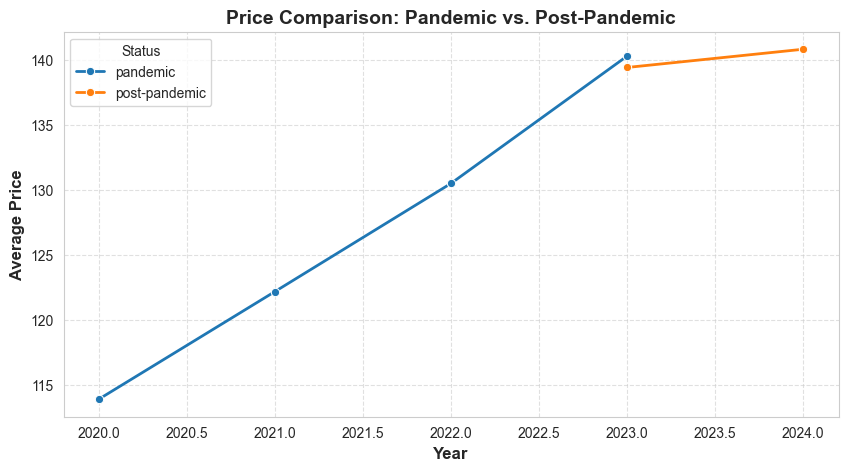

In [44]:
# Ensure 'date' column is in datetime format
df_merged["date"] = pd.to_datetime(df_merged["date"])

# Compute average price per year and status
df_status = df_merged.groupby(["year", "status"], as_index=False)["price"].mean()

# Plot price comparison between pandemic and post-pandemic periods
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_status, x="year", y="price", hue="status", marker="o", linewidth=2)

plt.xlabel("Year", fontsize=12, fontweight="bold")
plt.ylabel("Average Price", fontsize=12, fontweight="bold")
plt.title("Price Comparison: Pandemic vs. Post-Pandemic", fontsize=14, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Status")
plt.show()

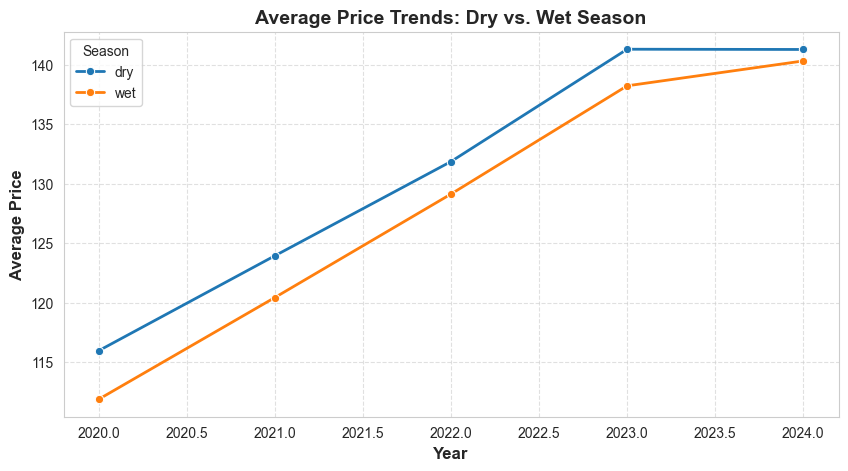

In [45]:
# Compute average price per season and year
df_season = df_merged.groupby(["year", "season"], as_index=False)["price"].mean()

# Plot price trends for dry vs. wet season
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_season, x="year", y="price", hue="season", marker="o", linewidth=2)

plt.xlabel("Year", fontsize=12, fontweight="bold")
plt.ylabel("Average Price", fontsize=12, fontweight="bold")
plt.title("Average Price Trends: Dry vs. Wet Season", fontsize=14, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Season")
plt.show()

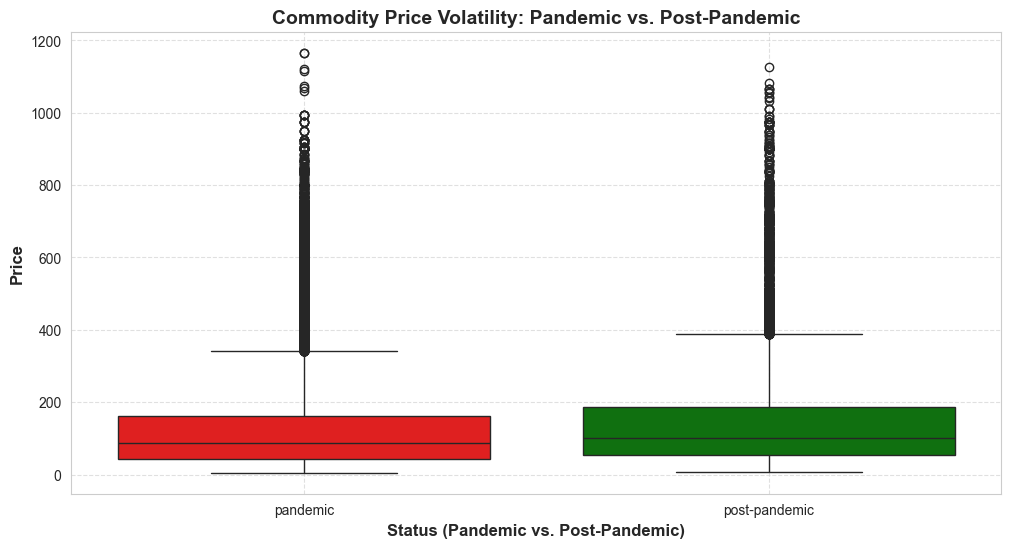

In [46]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged, x="status", y="price", palette=["red", "green"])

plt.xlabel("Status (Pandemic vs. Post-Pandemic)", fontsize=12, fontweight="bold")
plt.ylabel("Price", fontsize=12, fontweight="bold")
plt.title("Commodity Price Volatility: Pandemic vs. Post-Pandemic", fontsize=14, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

## Part 6: Application of Proximity (Distance Analysis)

- If highly correlated = mahalanobis
- If prone to outliers = manhattan
- Else, euclidean

## Part 6.1: Checking for Correlation

Correlation between price and distance_from_central: -0.12121596404255633


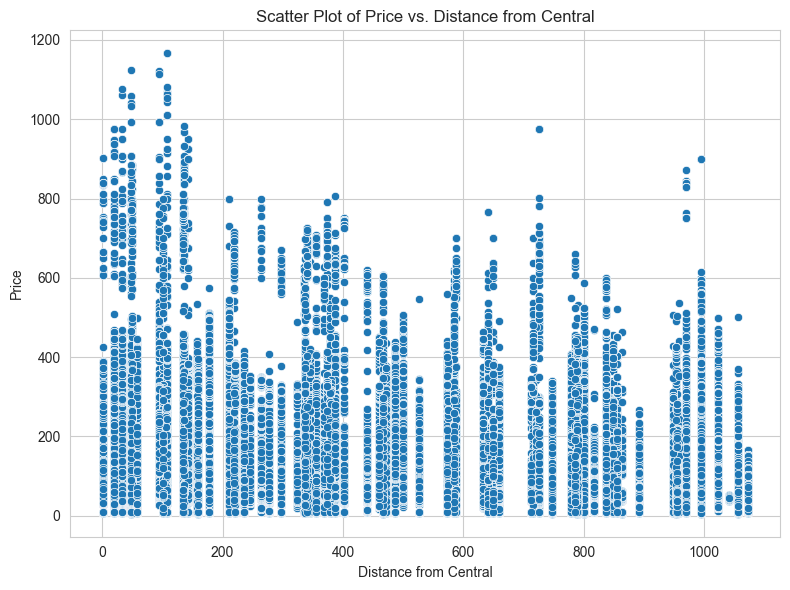

In [47]:
df_merged['price'] = pd.to_numeric(df_merged['price'], errors='coerce')
df_merged['distance_from_central'] = pd.to_numeric(df_merged['distance_from_central'], errors='coerce')
df_corr = df_merged[['price', 'distance_from_central']].dropna()

correlation_value = df_corr['price'].corr(df_corr['distance_from_central'])
print("Correlation between price and distance_from_central:", correlation_value)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_corr, x='distance_from_central', y='price')
plt.title("Scatter Plot of Price vs. Distance from Central")
plt.xlabel("Distance from Central")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

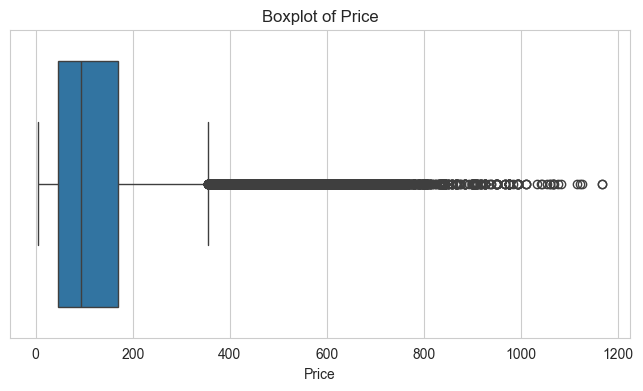

Skewness: 2.312
Excess Kurtosis: 7.712


In [48]:
data = df_merged['price']
plt.figure(figsize=(8, 4))
sns.boxplot(x=data)
plt.title("Boxplot of Price")
plt.xlabel("Price")
plt.show()

skewness = data.skew()
kurtosis = data.kurtosis()  # excess kurtosis (normal is 0)
print(f"Skewness: {skewness:.3f}")
print(f"Excess Kurtosis: {kurtosis:.3f}")

We got heavy skewness as well as high kurtosis so we'll do log transformation to reduce this skewness and tail heaviness before computing distances.

## Part 6.2: Checking for new skewness and kurtosis after doing log transformation

Skewness of log-transformed price: -0.331
Excess kurtosis of log-transformed price: 0.155


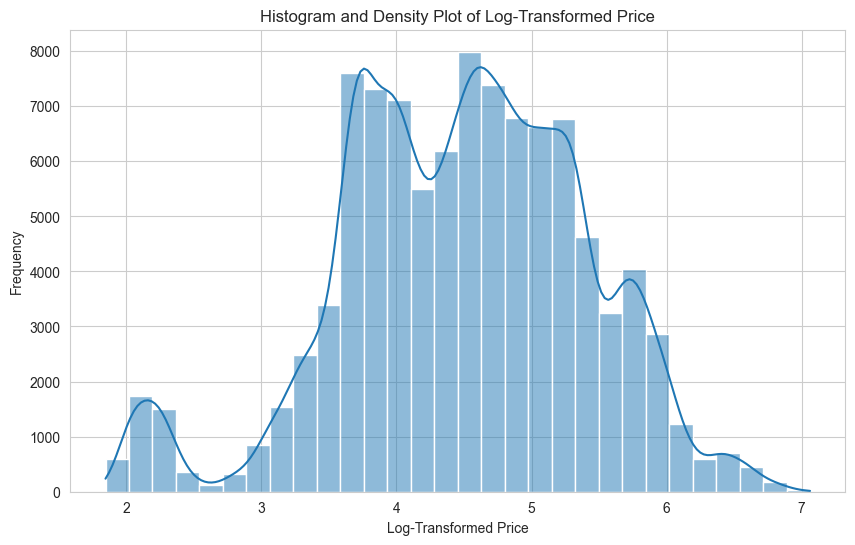

In [49]:
# Apply log transformation (log1p = log(1+x)) to price data to reduce skewness and kurtosis
# Then calculate new skewness/kurtosis metrics and plot distribution to verify improvement
df_merged['price_log'] = np.log1p(df_merged['price'])
price_log = df_merged['price_log'].dropna()
price_skewness = stats.skew(price_log)
price_excess_kurtosis = stats.kurtosis(price_log)

print(f"Skewness of log-transformed price: {price_skewness:.3f}")
print(f"Excess kurtosis of log-transformed price: {price_excess_kurtosis:.3f}")

plt.figure(figsize=(10, 6))
sns.histplot(price_log, bins=30, kde=True)
plt.title("Histogram and Density Plot of Log-Transformed Price")
plt.xlabel("Log-Transformed Price")
plt.ylabel("Frequency")
plt.show()

Using manhattan due to the presence of outliers

## Part 6.3: Distance Matrix

To capture the evolution of price over time, use time-specific averages

Yearly average log-transformed price by category:
             category  year  price_log
0  cereals and tubers  2020   3.787765
1  cereals and tubers  2021   3.789856
2  cereals and tubers  2022   3.825075
3  cereals and tubers  2023   3.928745
4  cereals and tubers  2024   4.045053

Pivoted DataFrame (yearly averages):
category  cereals and tubers  meat, fish and eggs  pulses and nuts  \
year                                                                 
2020                3.787765             4.904238         4.564426   
2021                3.789856             5.011648         4.601264   
2022                3.825075             5.079351         4.638564   
2023                3.928745             5.128980         4.661388   
2024                4.045053             5.137186         4.669527   

category  vegetables and fruits  
year                             
2020                   4.141597  
2021                   4.205727  
2022                   4.263098  
2023             

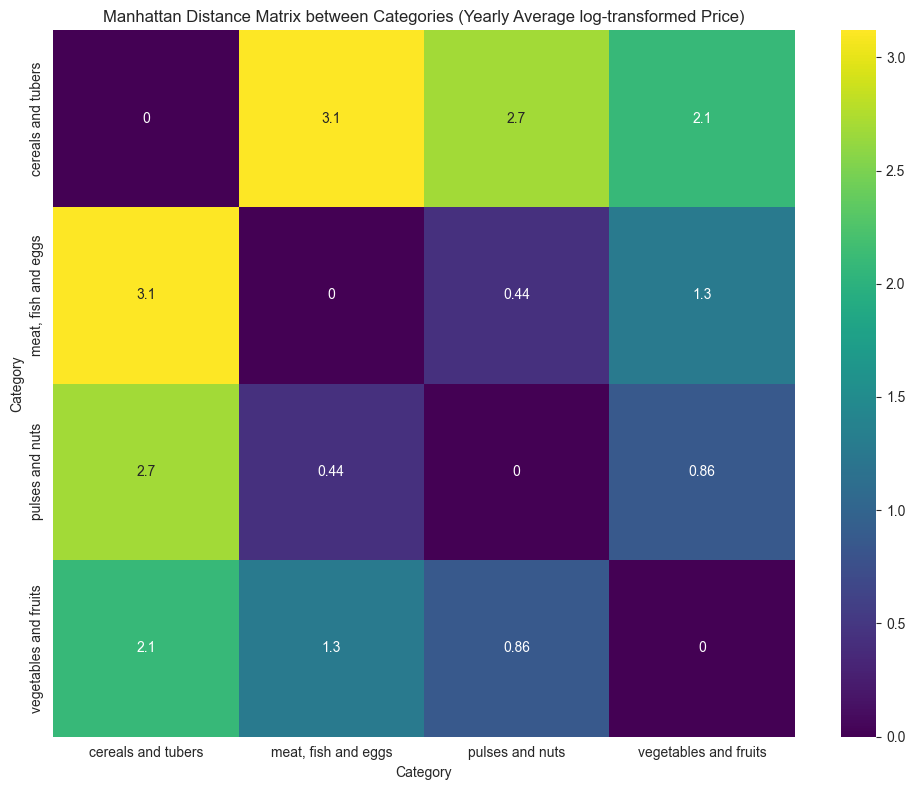


Ranking of closest distances between categories (based on log-transformed price):
                category            category2  distance
0        pulses and nuts  meat, fish and eggs  0.435222
1  vegetables and fruits      pulses and nuts  0.863896
2  vegetables and fruits  meat, fish and eggs  1.275832
3  vegetables and fruits   cereals and tubers  2.083546
4        pulses and nuts   cereals and tubers  2.683399
5    meat, fish and eggs   cereals and tubers  3.118621


In [50]:
# Extract year from date column
df_merged['year'] = df_merged['date'].dt.year

# Add log-transformed price column if it doesn't exist
if 'price_log' not in df_merged.columns:
    df_merged['price_log'] = np.log1p(df_merged['price'])

# Calculate yearly average log-transformed price for each category
avg_by_category_year = df_merged.groupby(['category', 'year'])['price_log'].mean().reset_index()
print("Yearly average log-transformed price by category:")
print(avg_by_category_year.head())

# Pivot data to get categories as columns and years as rows
pivot_df = avg_by_category_year.pivot(index='year', columns='category', values='price_log')
print("\nPivoted DataFrame (yearly averages):")
print(pivot_df.head())

# Standardize the data to have zero mean and unit variance
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivot_df)
# Transpose to get categories as rows
scaled_categories = scaled_data.T  

# Calculate Manhattan distance matrix between categories
dist_matrix = squareform(pdist(scaled_categories, metric='cityblock'))

# Convert distance matrix to DataFrame with category labels
dist_df = pd.DataFrame(dist_matrix, index=pivot_df.columns, columns=pivot_df.columns)
print("\nManhattan distance matrix between categories (based on yearly average log-transformed price):")
print(dist_df)

# Visualize distance matrix as heatmap
plt.figure(figsize=(10,8))
sns.heatmap(dist_df, annot=True, cmap='viridis')
plt.title("Manhattan Distance Matrix between Categories (Yearly Average log-transformed Price)")
plt.xlabel("Category")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

# Convert distance matrix to long format for ranking
dist_df.index.name = 'category'
# Melt the distance matrix to get pairwise distances
dist_long = dist_df.reset_index().melt(id_vars='category', var_name='category2', value_name='distance')
# Remove self-comparisons
dist_long = dist_long[dist_long['category'] != dist_long['category2']]
# Create sorted pairs of categories to remove duplicates
dist_long['pair'] = dist_long.apply(lambda row: tuple(sorted([row['category'], row['category2']])), axis=1)
# Keep only unique pairs
dist_long_unique = dist_long.drop_duplicates(subset='pair').drop(columns='pair')
# Sort by distance to get ranking
ranked_distances = dist_long_unique.sort_values(by='distance').reset_index(drop=True)

print("\nRanking of closest distances between categories (based on log-transformed price):")
print(ranked_distances)


Yearly average log-transformed price by region:
                                 admin1  year  price_log
0  Autonomous region in Muslim Mindanao  2020   4.133088
1  Autonomous region in Muslim Mindanao  2021   4.112581
2  Autonomous region in Muslim Mindanao  2022   4.219660
3  Autonomous region in Muslim Mindanao  2023   4.238949
4  Autonomous region in Muslim Mindanao  2024   4.191901
admin1  Autonomous region in Muslim Mindanao  \
year                                           
2020                                4.133088   
2021                                4.112581   
2022                                4.219660   
2023                                4.238949   
2024                                4.191901   

admin1  Cordillera Administrative region  National Capital region  Region I  \
year                                                                          
2020                            4.435042                 4.562147  4.386715   
2021                            4.46

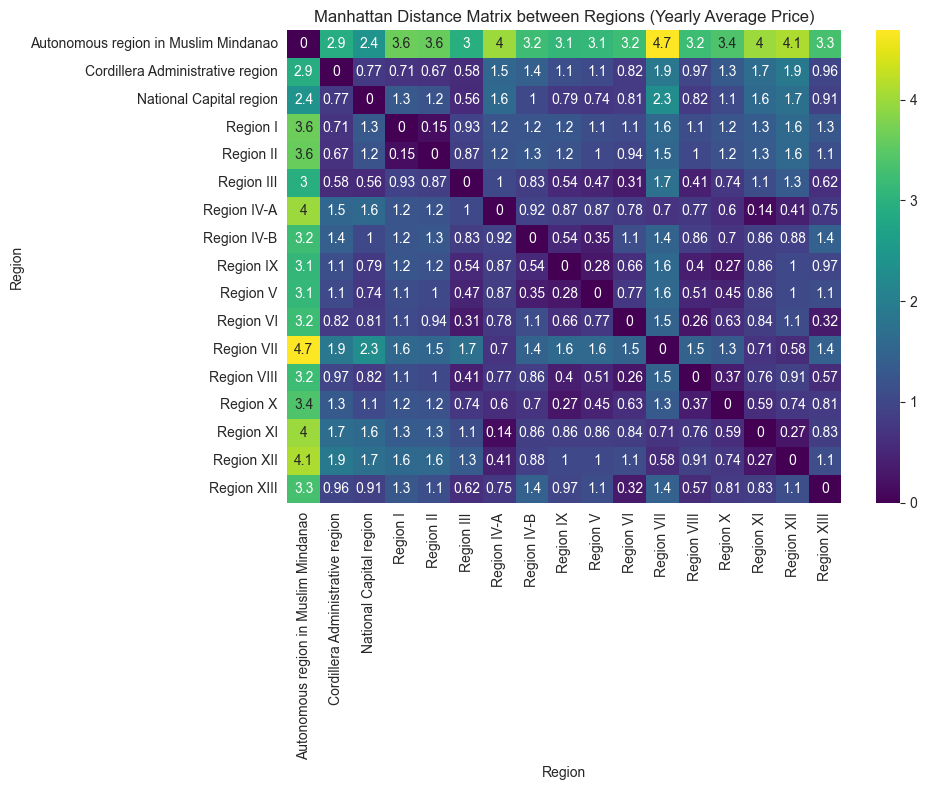


Ranking of closest distances between regions (based on yearly average log-transformed price):
          region                               region2  distance
0      Region XI                           Region IV-A  0.138092
1      Region II                              Region I  0.150720
2    Region VIII                             Region VI  0.258175
3       Region X                             Region IX  0.271228
4     Region XII                             Region XI  0.271777
..           ...                                   ...       ...
131     Region I  Autonomous region in Muslim Mindanao  3.634541
132    Region XI  Autonomous region in Muslim Mindanao  3.976668
133  Region IV-A  Autonomous region in Muslim Mindanao  3.986372
134   Region XII  Autonomous region in Muslim Mindanao  4.120499
135   Region VII  Autonomous region in Muslim Mindanao  4.689002

[136 rows x 3 columns]


In [51]:
# Calculate average log-transformed prices by region and year
avg_by_region_year = df_merged.groupby(['admin1', 'year'])['price_log'].mean().reset_index()
print("Yearly average log-transformed price by region:")
print(avg_by_region_year.head())

# Reshape data to have years as rows and regions as columns
pivot_df = avg_by_region_year.pivot(index='year', columns='admin1', values='price_log')
print(pivot_df.head())

# Standardize the data to have zero mean and unit variance across years
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivot_df)  
scaled_regions = scaled_data.T  # shape: (n_regions, n_years)

# Calculate Manhattan distance matrix between regions based on their price trajectories
dist_matrix = squareform(pdist(scaled_regions, metric='cityblock'))
dist_df = pd.DataFrame(dist_matrix, index=pivot_df.columns, columns=pivot_df.columns)
dist_df.index.name = 'region'

print("\nManhattan distance matrix between regions (based on yearly average log-transformed price):")
print(dist_df)

# Visualize the distance matrix as a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(dist_df, annot=True, cmap='viridis')
plt.title("Manhattan Distance Matrix between Regions (Yearly Average Price)")
plt.xlabel("Region")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

# Convert distance matrix to long format for ranking analysis
dist_long = dist_df.reset_index().melt(id_vars='region', var_name='region2', value_name='distance')
# Remove self-comparisons (distance to self is always 0)
dist_long = dist_long[dist_long['region'] != dist_long['region2']]
# Create sorted pairs to remove duplicate comparisons (A->B and B->A)
dist_long['pair'] = dist_long.apply(lambda row: tuple(sorted([row['region'], row['region2']])), axis=1)
dist_long_unique = dist_long.drop_duplicates(subset='pair').drop(columns='pair')

# Sort regions by similarity (smallest distance first)
ranked_distances = dist_long_unique.sort_values(by='distance').reset_index(drop=True)
print("\nRanking of closest distances between regions (based on yearly average log-transformed price):")
print(ranked_distances)

## Part 7: Data Mining: Association Rule Mining

In [52]:
# Create a checkpoints directory
CHECKPOINT_DIR = 'checkpoints'
if not os.path.exists(CHECKPOINT_DIR):
    os.makedirs(CHECKPOINT_DIR)

def save_checkpoint(year, processed_years, rules_dict):
    checkpoint_path = os.path.join(CHECKPOINT_DIR, 'fpgrowth_checkpoint.pkl')
    checkpoint = {
        'last_completed_year': year,
        'processed_years': processed_years,
        'rules_dict': rules_dict
    }
    with open(checkpoint_path, 'wb') as f:
        pickle.dump(checkpoint, f)
    print(f"Checkpoint saved for year {year} at: {checkpoint_path}")

def load_checkpoint():
    checkpoint_path = os.path.join(CHECKPOINT_DIR, 'fpgrowth_checkpoint.pkl')
    if os.path.exists(checkpoint_path):
        print(f"Loading checkpoint from: {checkpoint_path}")
        with open(checkpoint_path, 'rb') as f:
            return pickle.load(f)
    return None

In [53]:
def calculate_inflation_category(price_change):
    if pd.isna(price_change):
        return 'unknown'
    elif price_change < -0.05:
        return 'decrease'
    elif price_change > 0.05:
        return 'increase'
    else:
        return 'stable'

In [ ]:
def process_fp_growth(df_merged):
    print("Copying dataframe...")
    # Create a copy of df_merged
    df = df_merged.copy()
    
    # Ensure date is in datetime format
    df['date'] = pd.to_datetime(df['date'])
    
    # Calculate inflation (price change)
    print("Calculating inflation categories...")
    df = df.sort_values(['admin1', 'commodity', 'date'])
    
    # Handle potential NaN values before calculating price_change
    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    df['price_change'] = df.groupby(['admin1', 'commodity'])['price'].pct_change()
    
    # Define inflation_category function within the main function
    def calculate_inflation_category(price_change):
        if pd.isna(price_change):
            return 'unknown'
        elif price_change < -0.05:
            return 'decrease'
        elif price_change > 0.05:
            return 'increase'
        else:
            return 'stable'
    
    # Create inflation category
    df['inflation_category'] = df['price_change'].apply(calculate_inflation_category)
    
    # Handle any NaN values in other columns
    df['admin1'] = df['admin1'].fillna('unknown')
    df['commodity'] = df['commodity'].fillna('unknown')
    df['climate_season'] = df['climate_season'].fillna('unknown')
    
    # Create feature combinations
    print("Creating feature combinations...")
    df['feature'] = (
        'admin1_' + df['admin1'].astype(str) + '_' +
        'commodity_' + df['commodity'].astype(str) + '_' +
        'climate_' + df['climate_season'].astype(str) + '_' +
        'inflation_' + df['inflation_category'].astype(str)
    )
    
    # Remove any rows with NaN features
    df = df.dropna(subset=['feature'])
    
    # Create transactions (group by date)
    print("Creating transactions...")
    transactions = df.groupby('date')['feature'].agg(lambda x: list(x)).reset_index()
    
    try:
        # Create one-hot encoded matrix
        print("Creating one-hot encoded matrix...")
        encoded_data = pd.get_dummies(
            transactions['feature'].apply(pd.Series).stack()
        ).groupby(level=0).max()
        
        print(f"Shape of encoded data: {encoded_data.shape}")
        
        # Apply FP-Growth
        print("Applying FP-Growth...")
        frequent_itemsets = fpgrowth(encoded_data, min_support=0.01, use_colnames=True)
        print(f"Number of frequent itemsets found: {len(frequent_itemsets)}")
        
        # Generate rules only if we found frequent itemsets
        if len(frequent_itemsets) > 0:
            print("Generating association rules...")
            rules = association_rules(
                frequent_itemsets, 
                metric="confidence", 
                min_threshold=0.3
            )
            
            # Format rules for better readability
            def format_rules(rules):
                rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
                rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))
                return rules
            
            readable_rules = format_rules(rules)
            readable_rules = readable_rules.sort_values('lift', ascending=False)
            
            # Save results
            print("Saving results...")
            output_file = 'association_rules_results.csv'
            readable_rules.to_csv(output_file, index=False)
            
            # Print summary statistics
            print("\nSummary Statistics:")
            print(f"Total number of rules found: {len(readable_rules)}")
            print("\nTop 10 rules by lift:")
            print(readable_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))
            
            # Analysis by category
            print("\nRules by category:")
            for category in ['increase', 'decrease', 'stable']:
                n_rules = len(readable_rules[
                    readable_rules['antecedents'].str.contains(f'inflation_{category}') | 
                    readable_rules['consequents'].str.contains(f'inflation_{category}')
                ])
                print(f"Rules involving {category} prices: {n_rules}")
            
            return readable_rules
        else:
            print("No frequent itemsets found with current support threshold.")
            return None
            
    except Exception as e:
        print(f"Error during processing: {str(e)}")
        print("Current state of data:")
        print(f"Number of transactions: {len(transactions)}")
        print(f"Sample of features: {df['feature'].head()}")
        raise e

# Usage
try:
    start_time = time.time()
    rules_df = process_fp_growth(df_merged)
    if rules_df is not None:
        end_time = time.time()
        print(f"\nTotal execution time: {(end_time - start_time)/60:.2f} minutes")
    
except KeyboardInterrupt:
    print("\nProcess interrupted by user.")
except Exception as e:
    print(f"\nAn error occurred: {str(e)}")

Copying dataframe...
Calculating inflation categories...
Creating feature combinations...
Creating transactions...
Creating one-hot encoded matrix...
Shape of encoded data: (60, 5869)
Applying FP-Growth...
